# **Домашнее задание 1**
## Кусаинова Асем

# **Загрузка данных и аналитика**

In [1]:
import pandas as pd

# **1)**

In [2]:
schools = pd.read_excel("Schools Data.xlsx") # считываем данные с файла Schools Data.xlsx
schools.head()

,Unnamed: 0,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,barrier_free_2018,stud_have_book_count_2018,ip_higher_4mb_2018,poor_fams_2018,poor_fams_food_2018,dorms_for_villages_2018,total_teachers_2018,teachers_1_category_2018,higher_edu_teachers_2017,master_teachers,out_of_system_teachers_2018,in_emergency_2018,need_repair_2018,school_city_dist,only_out_toilet_2018,school_density_in_10km,school_density_in_3km,school_density_in1.5km,out_in_toilets_2018,total_comp_2018,interactive_boards_2017,cameras__2017,messa_2018,sport_stud,art_stud,appl_art_stud,technical_stud,soc_student,bio_eco_stud,tourist_stud,...,other_nationality_students,classrooms_per_student,classroom_average_area,working_area_ratio,diagnostic_cab,audiologist_cab,psychiatrist_cab,dentist_cab,psychologist_cab,no_special_cabs,medical_physical_cab,neuropatologist_cab,medical_cab,pedagog_psychologist_cab,кабинет психиатра,police_inspector_cab,speech_terapist_cab,ophtalmologist_cab,average_students_per_class,average_students_per_teacher,average_staff_per_area,sex_diversity_index,total_students_1,total_students_2,total_students_3,total_students_4,total_students_5,total_students_6,total_students_7,total_students_8,total_students_9,total_students_10,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements
0,0,1,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",833,70,42.0,8.0,0.0,0,1,829.0,1,0.034238,0.028335,0,56.0,39,0.979592,0.0,0.0,0,0,159.671211,0,4,4,4,1,21,1,комбинированное,1,258,238,129,14,17,46,100,...,0.205431,0.036600,46.532258,0.621464,False,False,False,False,False,False,False,False,True,True,False,False,False,False,24.200000,17.285714,0.004211,0.999999,0.0,0.090909,0.128689,0.092090,0.092090,0.082645,0.083825,0.095632,0.081464,0.018890,0.049587,0.904265,1.366129,да,0.047619,1.000000,1.000000,0.056856
1,1,2,Акмолинская область,общеобразовательная школа,528,52,18.0,0.0,0.0,0,1,528.0,1,0.038462,0.038462,0,37.0,25,0.945946,0.0,0.0,0,0,157.548424,0,4,4,2,0,38,1,комбинированное,1,137,39,11,0,21,19,0,...,0.205128,0.053114,34.279310,0.608910,False,False,False,False,True,False,False,False,True,False,False,False,False,False,22.750000,14.756757,0.005697,0.998913,0.0,0.097070,0.082418,0.122711,0.111722,0.097070,0.076923,0.106227,0.098901,0.047619,0.031136,0.889412,1.011111,да,0.222222,1.000000,1.000000,0.014740
2,2,3,Акмолинская область,"общеобразовательная школа, интернат при общеоб...",714,56,37.0,2.0,0.0,0,1,677.0,1,0.107513,0.066062,0,57.0,41,1.000000,0.0,3.0,0,0,160.020080,0,4,4,3,0,43,1,комбинированное,1,250,94,84,0,21,19,22,...,0.031088,0.047927,53.375676,0.613985,False,False,False,False,False,False,False,False,True,False,False,False,False,False,22.057143,14.296296,0.003929,0.997577,0.0,0.076425,0.094560,0.116580,0.094560,0.093264,0.117876,0.072539,0.073834,0.034974,0.051813,0.350848,0.919048,да,0.108108,0.909091,1.000000,0.050197
3,3,4,Акмолинская область,общеобразовательная школа,354,33,18.0,0.0,21.0,0,1,354.0,1,0.057789,0.000000,0,36.0,24,0.864865,1.0,2.0,0,0,159.426652,0,4,4,4,0,29,1,комбинированное,1,72,58,63,0,51,0,21,...,0.218593,0.037688,43.266667,0.642497,False,False,False,False,False,False,False,False,True,False,False,False,False,False,18.952381,10.756757,0.007649,0.998763,0.0,0.085427,0.110553,0.075377,0.097990,0.092965,0.108040,0.092965,0.085427,0.022613,0.045226,0.861186,1.658333,да,0.000000,0.888889,0.969697,0.000000
4,4,5,Акмолинская область,"общеобразовательная школа, малокомплектная шко...",139,20,15.0,0.0,0.0,0,1,138.0,1,0.160256,0.147436,1,27.0,7,0.782609,0.0,0.0,0,0,178.334438,0,2,0,0,1,30,1,комбинированное,1,52,12,33,2,26,0,0,...,0.378205,0.160256,34.924000,0.599364,False,False,False,False,False,False,False,False,True,True,False,False,False,False,9.750000,6.782609,0.003598,0.991946,0.0,0.064103,0.115385,0.089744,0.121795,0.083333,0.10

# **2)**


In [3]:
list(schools.columns) # достаем список всех колонок в датасете

['Unnamed: 0',
 'ID',
 'region',
 'school_type',
 'total_students_2018',
 'total_after_9_2018',
 'total_after_11_2018',
 'diff_teens_2018',
 'deficit_places_2018',
 '3_times_school_2018',
 'barrier_free_2018',
 'stud_have_book_count_2018',
 'ip_higher_4mb_2018',
 'poor_fams_2018',
 'poor_fams_food_2018',
 'dorms_for_villages_2018',
 'total_teachers_2018',
 'teachers_1_category_2018',
 'higher_edu_teachers_2017',
 'master_teachers',
 'out_of_system_teachers_2018',
 'in_emergency_2018',
 'need_repair_2018',
 'school_city_dist',
 'only_out_toilet_2018',
 'school_density_in_10km',
 'school_density_in_3km',
 'school_density_in1.5km',
 'out_in_toilets_2018',
 'total_comp_2018',
 'interactive_boards_2017',
 'cameras__2017',
 'messa_2018',
 'sport_stud',
 'art_stud',
 'appl_art_stud',
 'technical_stud',
 'soc_student',
 'bio_eco_stud',
 'tourist_stud',
 'nat_math_stud',
 'lang_stud',
 'other_stud',
 'add_edu_stud',
 'high_category_teachers_2018',
 'eng_informatics_teachers',
 'eng_phys_teacher

In [4]:
schools_cat = schools.select_dtypes(include=['object']) # выбираем только колонки с категориальными данными
schools_cat.head() 

,region,school_type,cameras__2017,location,tip_organizacii_obrazovaniya,open_date,canteen,buffet,nutrition_in_apapted_premises,computer_availability_2017,gym_2017,gym_equipment_2017,civil_protection_alert_system_2017,panic_button_2017,tourniquet_2017,museum,camp_2017,building_type_typical,heating_type_2017,building_condition_2017,building_type_2017,hot_water_2017,import_water,building_ownership_2017,landscaping,toilet_2017,med_cab_2017,edu_lang_2017,future_edu_lang_2017,spec_school_2017,edu_from_class_num_2017,spec_edu_from_class_num_2017,drinking_water_presence
0,Акмолинская область,"общеобразовательная школа, опорная школа (ресу...",комбинированное,г.Акколь,"Организации среднего образования(начального, о...",1978-01-03 00:00:00,да,нет,нет,да,да,"спортивные площадки,спортивные секции",нет,да,нет,да,нет,типовое,на твердом топливе,проведён,кирпичное,нет,нет,Собственное,наличие всех видов благоустройств,наличие теплых и надворных туалетов,да,русский,русский,0,1-4,0,да
1,Акмолинская область,общеобразовательная школа,комбинированное,г.Акколь,"Организации среднего образования(начального, о...",1971-09-01 00:00:00,да,нет,нет,да,да,"спортивные площадки,спортивные секции",да,да,да,нет,нет,типовое,на твердом топливе,требует,кирпичное,нет,нет,Собственное,наличие всех видов благоустройств,наличие только теплых туалетов,да,русский,русский,0,1-4,0,да
2,Акмолинская область,"общеобразовательная школа, интернат при общеоб...",комбинированное,г.Акколь,"Организации среднего образования(начального, о...",1988-09-01 00:00:00,да,нет,нет,да,да,"спортивные площадки,спортивные секции",нет,нет,да,нет,нет,типовое,на твердом топливе,проведён,другое,нет,нет,Собственное,наличие всех видов благоустройств,наличие только теплых туалетов,да,казахский,казахский,0,предшкольное,0,да
3,Акмолинская область,общеобразовательная школа,комбинированное,г.Акколь,"Организации среднего образования(начального, о...",1957-09-01 00:00:00,нет,да,да,да,да,"спортивные площадки,спортивные секции",нет,да,нет,нет,нет,типовое,на твердом топливе,требует,блочное,нет,нет,Собственное,наличие всех видов благоустройств,наличие только теплых туалетов,да,русский,русский,0,предшкольное,0,да
4,Акмолинская область,"общеобразовательная школа, малокомплектная шко...",комбинированное,с.Урюпинка,"Организации среднего образования(начального, о...",1978-09-01 00:00:00,да,нет,нет,да,да,другой,нет,нет,нет,нет,нет,типовое,на твердом топливе,требует,другое,нет,нет,Собственное,наличие всех видов благоустройств,наличие теплых и надворных туалетов,да,"казахский,русский",русский,0,1-4,0,да


In [5]:
schools_cat.edu_lang_2017.value_counts() # предположим, что мы хотели узнать актуальные языки обучения школ на 2017 год

казахский            3180
казахский,русский    1614
русский              1120
другой                150
Name: edu_lang_2017, dtype: int64

# **3)**


In [6]:
gdp = pd.read_excel("GDP by region.xlsx") # считываем файл GDP by region.xlsx
gdp

,Адм.единица,2017,% от страны
0,Алматы,8741885.2,20.3%
1,Атырауская область,5442058.4,12.6%
2,Астана,4637688.4,10.8%
3,Карагандинская область,3413949.2,7.9%
4,Туркестанская область,2680982.2,6.2%
5,Восточно-Казахстанская область,2506248.0,5.8%
6,Мангистауская область,2231986.2,5.2%
7,Алматинская область,1890574.4,4.4%
8,Западно-Казахстанская область,1979439.4,4.6%
9,Актюбинская область,1991774.4,4.6%


In [7]:
gdp.set_index("Адм.единица", inplace=True)

In [8]:
schools_with_vvp = schools.join(gdp.iloc[:, 0], on = 'region') # присоединяем колонку ВВП с названием "2017" к изначальной таблице школ
schools_with_vvp.columns[-1]

2017


# **4)**


In [9]:
# значение корреляции между всеми атрибутами школ и уровнем ВВП 
schools_with_vvp.corrwith(schools_with_vvp[2017]).sort_values(ascending = False)

2017                           1.000000
kazakh_students                0.199332
student_edu_lang_kaz_2017      0.194209
lingaphone_cab_2017            0.170661
load_ratio                     0.154839
                                 ...   
qedu_passed_ent               -0.167415
russian_students              -0.184637
out_in_toilets_2018           -0.184761
nationality_diversity_index   -0.193291
student_edu_lang_rus_2017     -0.215273
Length: 180, dtype: float64

Корреляция:  -0.03732643052068207


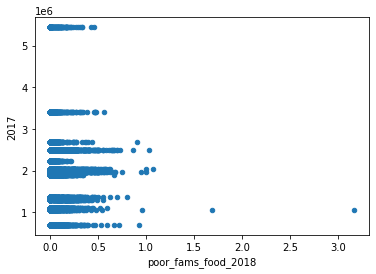

In [10]:
# зависимость количества еды для бедных семей и уровнем ВВП
print("Корреляция: ", schools_with_vvp['poor_fams_food_2018'].corr(schools_with_vvp[2017]))
schools_with_vvp[['poor_fams_food_2018', 2017]].plot.scatter('poor_fams_food_2018', 2017)

Корреляция:  0.11639257586473396


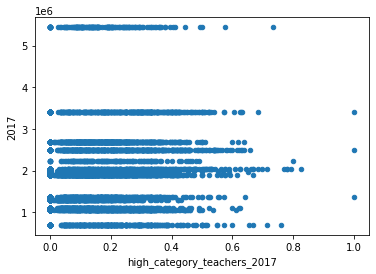

In [11]:
# зависимость количества учителей высшей категории и уровнем ВВП
print("Корреляция: ", schools_with_vvp['high_category_teachers_2017'].corr(schools_with_vvp[2017]))
schools_with_vvp[['high_category_teachers_2017', 2017]].plot.scatter('high_category_teachers_2017', 2017)

Корреляция:  0.03293151135888557


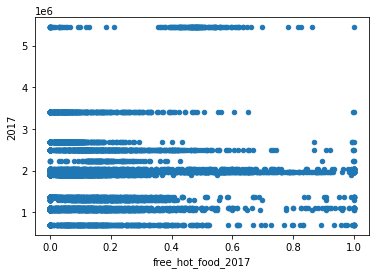

In [12]:
# зависимость наличия бесплатной горячей еды и уровнем ВВП
print("Корреляция: ", schools_with_vvp['free_hot_food_2017'].corr(schools_with_vvp[2017]))
schools_with_vvp[['free_hot_food_2017', 2017]].plot.scatter('free_hot_food_2017', 2017)

# **5)**

In [13]:
print("Гипотеза: количество учителей высшей категории положительно влияет на баллы ЕНТ")
print("Корреляция: ", schools_with_vvp['high_category_teachers_2017'].corr(schools_with_vvp['qedu_passed_ent']))
print("Ответ: Наблюдается слабая положительная корреляция")

Гипотеза: количество учителей высшей категории положительно влияет на баллы ЕНТ
Корреляция:  0.11962245025125984
Ответ: Наблюдается слабая положительная корреляция


In [14]:
print("Гипотеза: чем больше достижений у школьников тем больше количество школьников поступивших в топ университет")
print("Корреляция: ", schools_with_vvp['qedu_elite_achievements'].corr(schools_with_vvp['qedu_top_uni']))
print("Ответ: Наблюдается слабая положительная корреляция")

Гипотеза: чем больше достижений у школьников тем больше количество школьников поступивших в топ университет
Корреляция:  0.12866265905289548
Ответ: Наблюдается слабая положительная корреляция


# **Отчёты**


# **1)**


In [15]:
for region, df_region in schools_with_vvp.groupby('region'): # деление файла на 16 файлов по регионам
  df_region.to_excel(region + ".xlsx")  

## **2)**


In [16]:
for region, df_region in schools_with_vvp.groupby('region'): # вывод черного списка школ где количество учеников набравших проходной балл по ент меньше 0.5
  print(region)
  print(df_region[df_region['qedu_passed_ent'] < 0.5])

Акмолинская область
     Unnamed: 0     ID  ... qedu_elite_achievements       2017
52           52     58  ...                     0.0  1110777.4
119         119    136  ...                     0.0  1110777.4
129         129    146  ...                     0.0  1110777.4
149         149    173  ...                     0.0  1110777.4
314         314    424  ...                     0.0  1110777.4
471         471  81161  ...                     0.0  1110777.4
479         479  87080  ...                     0.0  1110777.4

[7 rows x 213 columns]
Актюбинская область
     Unnamed: 0     ID  ... qedu_elite_achievements       2017
487         487   1267  ...                0.000000  1991774.4
490         490   1270  ...                0.000000  1991774.4
499         499   1280  ...                0.023077  1991774.4
509         509   1301  ...                0.033166  1991774.4
515         515   1323  ...                0.000000  1991774.4
546         546   1360  ...                0.072362  1

# **2.1)**


In [17]:
# список школ с проблемами с материальной обеспеченностью 
schools_with_vvp[(schools_with_vvp['need_repair_2018'] == 1) & 
                 (schools_with_vvp['hot_water_2017'] == 'нет') &
                 (schools_with_vvp['only_out_toilet_2018'] == 1) &
                 (schools_with_vvp['canteen'] == 'нет')]

,Unnamed: 0,ID,region,school_type,total_students_2018,total_after_9_2018,total_after_11_2018,diff_teens_2018,deficit_places_2018,3_times_school_2018,barrier_free_2018,stud_have_book_count_2018,ip_higher_4mb_2018,poor_fams_2018,poor_fams_food_2018,dorms_for_villages_2018,total_teachers_2018,teachers_1_category_2018,higher_edu_teachers_2017,master_teachers,out_of_system_teachers_2018,in_emergency_2018,need_repair_2018,school_city_dist,only_out_toilet_2018,school_density_in_10km,school_density_in_3km,school_density_in1.5km,out_in_toilets_2018,total_comp_2018,interactive_boards_2017,cameras__2017,messa_2018,sport_stud,art_stud,appl_art_stud,technical_stud,soc_student,bio_eco_stud,tourist_stud,...,classrooms_per_student,classroom_average_area,working_area_ratio,diagnostic_cab,audiologist_cab,psychiatrist_cab,dentist_cab,psychologist_cab,no_special_cabs,medical_physical_cab,neuropatologist_cab,medical_cab,pedagog_psychologist_cab,кабинет психиатра,police_inspector_cab,speech_terapist_cab,ophtalmologist_cab,average_students_per_class,average_students_per_teacher,average_staff_per_area,sex_diversity_index,total_students_1,total_students_2,total_students_3,total_students_4,total_students_5,total_students_6,total_students_7,total_students_8,total_students_9,total_students_10,total_students_11,nationality_diversity_index,load_ratio,drinking_water_presence,qedu_top_uni,qedu_passed_ent,qedu_continued_education,qedu_elite_achievements,2017
823,823,599,Алматинская область,"основная средняя школа, малокомплектная школа",48,5,0.0,0.0,0.0,0,1,43.0,1,0.000000,0.000000,0,18.0,13,0.842105,0.0,0.0,0,1,85.525057,1,2,0,0,0,20,0,комбинированное,0,30,30,17,0,0,0,1,...,0.388889,11.966667,0.251503,False,False,False,False,True,False,False,False,True,False,False,False,False,False,6.000000,2.842105,0.001830,1.000000,0.000000,0.129630,0.111111,0.092593,0.092593,0.092593,0.092593,0.092593,0.092593,0.000000,0.000000,0.000000,0.720000,да,0.000000,NaN,1.000000,0.0,1890574.4
837,837,640,Алматинская область,"основная средняя школа, малокомплектная школа",45,6,0.0,1.0,0.0,0,0,44.0,1,0.000000,0.000000,0,17.0,11,0.928571,0.0,0.0,0,1,143.238486,1,3,0,0,0,23,0,комбинированное,0,34,12,4,1,0,0,0,...,0.375000,52.611111,0.883396,False,False,False,False,True,False,False,False,True,False,False,False,False,False,4.800000,3.428571,0.004664,0.998264,0.000000,0.104167,0.125000,0.020833,0.104167,0.104167,0.104167,0.104167,0.104167,0.000000,0.000000,0.596246,0.218182,да,0.000000,NaN,1.000000,0.0,1890574.4
840,840,645,Алматинская область,"начальная школа, малокомплектная школа",5,0,0.0,0.0,0.0,0,0,2.0,1,0.000000,0.000000,0,1.0,0,1.000000,0.0,0.0,0,1,171.460781,1,1,0,0,0,20,0,комбинированное,0,0,0,0,0,0,0,0,...,1.200000,41.366667,0.861167,False,False,False,False,False,False,False,False,True,True,False,False,False,False,1.666667,5.000000,0.006036,0.960000,0.000000,0.400000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,нет,0.000000,NaN,1.000000,0.0,1890574.4
875,875,682,Алматинская область,общеобразовательная школа,199,21,9.0,1.0,0.0,0,1,199.0,1,0.069869,0.000000,0,29.0,14,0.833333,0.0,0.0,0,1,184.266414,1,5,0,0,0,18,1,комбинированное,0,142,1,32,18,0,13,0,...,0.082969,1.894737,0.455621,False,False,False,False,False,False,False,False,True,False,False,False,False,False,15.266667,7.633333,0.003673,0.979234,0.000000,0.131004,0.069869,0.087336,0.061135,0.131004,0.091703,0.078603,0.087336,0.034934,0.043668,0.186853,0.763333,нет,0.000000,0.800000,0.954545,0.0,1890574.4
906,906,725,Алматинская область,основная средняя школа,267,11,0.0,0.0,118.5,0,0,258.0,1,0.003788,0.000000,0,33.0,18,0.833333,0.0,0.0,0,1,50.065187,1,25,3,0,0,27,1,комбинированное,1,232,10,21,0,13,0,0,...,0.045455,100.000000,1.000000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,11.478261,8.800000,0.010552,0.979281,0.000000,0.060606,0.075758,0.140152,0.128788,0.079545,0.071970,0.132576,0.045455,0.000000,0.000000,0.381802,2.869565,да,0.0000

# **3.1)**


In [18]:
# топ школ по количеству учителей владеющих англиским языком
schools_with_vvp[['eng_informatics_teachers', 'eng_phys_teachers', 'eng_chem_teachers', 'eng_bio_teachers']].sum(axis = 1).sort_values(ascending=False)

4449    13
2730    13
4464    12
2516    12
2815    12
        ..
2787     0
2786     0
2785     0
2784     0
6063     0
Length: 6064, dtype: int64

# **3.2)**


In [19]:
# топ школ по количеству учителей владеющих английским языком по каждой специальности
specs = ['eng_informatics_teachers', 'eng_phys_teachers', 'eng_chem_teachers', 'eng_bio_teachers']
for s in specs:
  print(s)
  print(schools_with_vvp[s].sort_values(ascending=False))

eng_informatics_teachers
4594    5
5488    5
2374    5
2729    5
2361    5
       ..
3809    0
3810    0
3811    0
3812    0
0       0
Name: eng_informatics_teachers, Length: 6064, dtype: int64
eng_phys_teachers
2957    5
2374    4
2735    4
1071    3
2434    3
       ..
3847    0
3848    0
3849    0
3850    0
3031    0
Name: eng_phys_teachers, Length: 6064, dtype: int64
eng_chem_teachers
3164    4
3196    4
3525    3
3524    3
5469    3
       ..
3859    0
3860    0
3861    0
3862    0
3031    0
Name: eng_chem_teachers, Length: 6064, dtype: int64
eng_bio_teachers
2730    5
3056    4
2516    4
2728    4
4455    4
       ..
5255    0
3190    0
5254    0
3192    0
6063    0
Name: eng_bio_teachers, Length: 6064, dtype: int64


# **4, 4.1)**


In [20]:
# статистика по каждому населённому пункты
new = pd.DataFrame(columns = ['Населенный пункт',
                              'Количество школ',
                              'Процент школ с доступом в интернет',
                              'Наличие хотя бы одной школы без доступа к питьевой воде',
                              'Процент школ с учителями владеющими английским языком'])
  
for i in schools_with_vvp.groupby('location'):
  water = None
  count = 0
  school_num = i[1].ID.count()
  with_internet = i[1]['location'][i[1].computer_w_internet_2017 > 0].count() / school_num * 100
  if 'нет' in i[1].drinking_water_presence.values:
    water = 'да'
  else:
    water = 'нет'
  eng_teachers = i[1][['eng_informatics_teachers', 'eng_phys_teachers', 'eng_chem_teachers', 'eng_bio_teachers']].sum(axis = 1)
  for j in eng_teachers:
    if j > 0:
      count += 1
  with_eng_teachers = count / school_num * 100

  out = pd.Series(data = {'Населенный пункт': i[0],
                          'Количество школ': school_num,
                          'Процент школ с доступом в интернет': with_internet,
                          'Наличие хотя бы одной школы без доступа к питьевой воде': water,
                          'Процент школ с учителями владеющими английским языком': with_eng_teachers})
  new = new.append(out, ignore_index=True)
new.to_excel("location_stats.xlsx")